Import glucose dataset

In [0]:
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn import datasets

# Load the diabetes dataset
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

samp, natt = X.shape

Error Plotting

In [0]:
kwargs = {'linewidth' : 3.5}
font = {'weight' : 'normal', 'size' : 24}
matplotlib.rc('font', **font)

def error_plot(y, yscale='log'):
  plt.figure(figsize=(5,5))
  plt.xlabel('Iteration')
  plt.ylabel('Error')
  plt.yscale(yscale)
  plt.plot(range(len(y)), y, **kwargs)

Gradient Descent

In [0]:
def MSE(X,y,w):
  return 0.5*np.linalg.norm(X.dot(w)-y)**2

def gradientDescent(X,y,theta,iters,alpha):
    weights = [theta]
    m = len(y)
    for _ in range(iters):
        h = X.dot(weights[-1])
        loss = h - y
        # Gradient Calculation
        gradient = X.T.dot(loss)
        # Changing Values of B using Gradient
        weights.append(weights[-1] - alpha * gradient)    
    return weights

In [0]:
def get_y_pred(X,w):
  y_pred = np.dot(X,w)
  return y_pred

Split into into testing and training sets

In [0]:
d = X.shape[1]

w0 = np.zeros(d+1)
print(d+1)
num_of_rows_x = int(np.round(X.shape[0]) * 0.8)

ones = np.ones((X.shape[0],1))
newX = np.hstack((ones,X))

train_X = newX[:num_of_rows_x]
test_X = newX[num_of_rows_x:] 

num_of_rows_y = int(np.round(y.shape[0]) * 0.8)

train_y = y[:num_of_rows_y]
test_y = y[num_of_rows_y:]

print("X_train shape -> {}".format(train_X.shape))
print("y_train shape -> {}".format(train_y.shape))
print("X_test shape -> {}".format(test_X.shape))
print("y_test shape -> {}".format(test_y.shape))

11
X_train shape -> (353, 11)
y_train shape -> (353,)
X_test shape -> (89, 11)
y_test shape -> (89,)


Find linear regression of the training data

In [0]:
ws = gradientDescent(train_X, train_y, w0, 1000, 0.005)
final_weights = ws[-1]

y_pred = get_y_pred(test_X, final_weights)

Error plot for training data

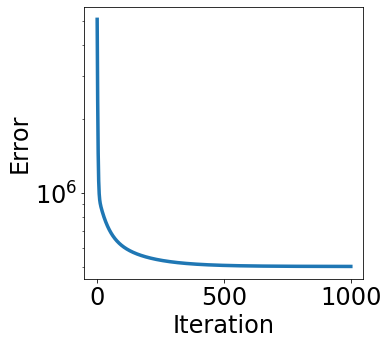

In [0]:
error = lambda w: MSE(train_X,train_y,w)
error_plot([error(w) for w in ws])

In [0]:
mse = MSE(test_X,test_y,final_weights)
print(mse)

133443.95692934337


Calculating R2 value

In [0]:
RSS = np.mean((y_pred-test_y)**2)/(np.std(test_y)**2)
Rsq = 1-RSS
print("RSS per sample = {0:f}".format(RSS))
print("R^2 =            {0:f}".format(Rsq))

RSS per sample = 0.466965
R^2 =            0.533035


SK Learn

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

regression_model = LinearRegression()

# Fit the data(train the model)
regression_model.fit(train_X, train_y)
# Predict
y_predicted = regression_model.predict(test_X)

# model evaluation
rmse = mean_squared_error(test_y, y_predicted)
print (rmse)
r2 = r2_score(test_y, y_predicted)
print(r2)

2929.8869734402206
0.5437570976176231
